In [3]:
import os
import sys
import pandas as pd
import numpy as np
from copy import copy
import warnings
import importlib
from IPython.core.interactiveshell import InteractiveShell
notebook_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
    
utils_path = os.path.join(project_root, "utils")
if utils_path not in sys.path:
    sys.path.append(utils_path)

    
import get_data

In [2]:
# combined_df, patientIds = get_data.get_dataset()
# #SAVE DATAFRAME
# DATA_PATH = get_data.get_dataset_abspath()
# save_path = os.path.join(DATA_PATH, "raw_combined_data.parquet")
# combined_df.to_parquet(save_path, compression="snappy")

Processing training_setA:   0%|          | 0/20336 [00:00<?, ?it/s]

Processing training_setB:   0%|          | 0/20000 [00:00<?, ?it/s]

In [ ]:
#ACCESS DATAFRAME
DATA_PATH = get_data.get_dataset_abspath()
load_path = os.path.join(DATA_PATH, "raw_combined_data.parquet")
combined_df = pd.read_parquet(load_path)

      HR  O2Sat  Temp    SBP    MAP  DBP  Resp  EtCO2  BaseExcess  HCO3  ...  \
0    NaN    NaN   NaN    NaN    NaN  NaN   NaN    NaN         NaN   NaN  ...   
1   97.0   95.0   NaN   98.0  75.33  NaN  19.0    NaN         NaN   NaN  ...   
2   89.0   99.0   NaN  122.0  86.00  NaN  22.0    NaN         NaN   NaN  ...   
3   90.0   95.0   NaN    NaN    NaN  NaN  30.0    NaN        24.0   NaN  ...   
4  103.0   88.5   NaN  122.0  91.33  NaN  24.5    NaN         NaN   NaN  ...   

   Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  ICULOS  SepsisLabel  \
0        NaN  83.14       0    NaN    NaN        -0.03       1            0   
1        NaN  83.14       0    NaN    NaN        -0.03       2            0   
2        NaN  83.14       0    NaN    NaN        -0.03       3            0   
3        NaN  83.14       0    NaN    NaN        -0.03       4            0   
4        NaN  83.14       0    NaN    NaN        -0.03       5            0   

   patient_id  dataset  
0           1      

In [5]:
import analyse_data

df_A = combined_df[combined_df['dataset'] == 'A']
df_B = combined_df[combined_df['dataset'] == 'B']
importlib.reload(analyse_data)
analyse_data.summariseSeperateDatasets(df_A, "A")
analyse_data.summariseSeperateDatasets(df_B, "B")



Hospital system: A
  Number of patients: 20336
  Number of septic patients: 1790
  Sepsis prevalence: 8.8%
  Number of rows: 790215
  Number of entries: 11876446
  Density of entries: 35.0%


Hospital system: B
  Number of patients: 20000
  Number of septic patients: 1142
  Sepsis prevalence: 5.7%
  Number of rows: 761995
  Number of entries: 11356429
  Density of entries: 34.7%




In [6]:
# analyse_data.summaryStatistics(combined_df)
# analyse_data.covariance(combined_df)
# analyse_data.nullCols(combined_df)
# analyse_data.distributions(combined_df)
importlib.reload(analyse_data)
metrics = analyse_data.compare_two_datasets(df_A, df_B)
for col, met in metrics.items():
    print(f"Column: {col}")
    for metric, value in met.items():
        print(f"  {metric}: {value}")
    print("\n")
#open text editor to view properly


Column: Hgb
  KS Statistic: 0.17195705402158007
  KS p-value: 0.0
  Wasserstein Distance: 0.5684917943509119
  JSD: 0.04271370714769419
  KL Divergence: 0.11274656324734483
  Valid Merge: False


Column: PTT
  KS Statistic: 0.05125010161680879
  KS p-value: 1.3820117812340158e-14
  Wasserstein Distance: 3.257633329957348
  JSD: 0.4134132090346235
  KL Divergence: 1.0765309670763288
  Valid Merge: False


Column: Age
  KS Statistic: 0.09310908905434445
  KS p-value: 0.0
  Wasserstein Distance: 2.6052750595342067
  JSD: 0.11404854468548944
  KL Divergence: 2.498512941369894
  Valid Merge: False


Column: ICULOS
  KS Statistic: 0.024665571796233632
  KS p-value: 1.8674582084984578e-205
  Wasserstein Distance: 1.0975320514476592
  JSD: 0.0008859414973736711
  KL Divergence: 0.002422480734979869
  Valid Merge: False


Column: Platelets
  KS Statistic: 0.02458798509794513
  KS p-value: 2.252804849377374e-12
  Wasserstein Distance: 8.190651337266416
  JSD: 0.052872865910787804
  KL Divergence


Replacement statistics (percentages):
Column: HR
  Method: linear
  Initial missing: 153399
  Linear fill: 100.00%
Column: O2Sat
  Method: linear
  Initial missing: 202736
  Linear fill: 100.00%
Column: SBP
  Method: linear
  Initial missing: 226265
  Linear fill: 100.00%
Column: MAP
  Method: linear
  Initial missing: 193270
  Linear fill: 100.00%
Column: Resp
  Method: linear
  Initial missing: 238335
  Linear fill: 100.00%
Column: Temp
  Method: cluster
  Initial missing: 1026984
  Cluster-mean fill: 100.00%
  Nearest cluster-mean fill: 0.00%
Column: DBP
  Method: cluster
  Initial missing: 486554
  Cluster-mean fill: 100.00%
  Nearest cluster-mean fill: 0.00%
Column: BaseExcess
  Method: cluster
  Initial missing: 1468065
  Cluster-mean fill: 100.00%
  Nearest cluster-mean fill: 0.00%
Column: HCO3
  Method: cluster
  Initial missing: 1487182
  Cluster-mean fill: 100.00%
  Nearest cluster-mean fill: 0.00%
Column: FiO2
  Method: cluster
  Initial missing: 1422845
  Cluster-mean fill

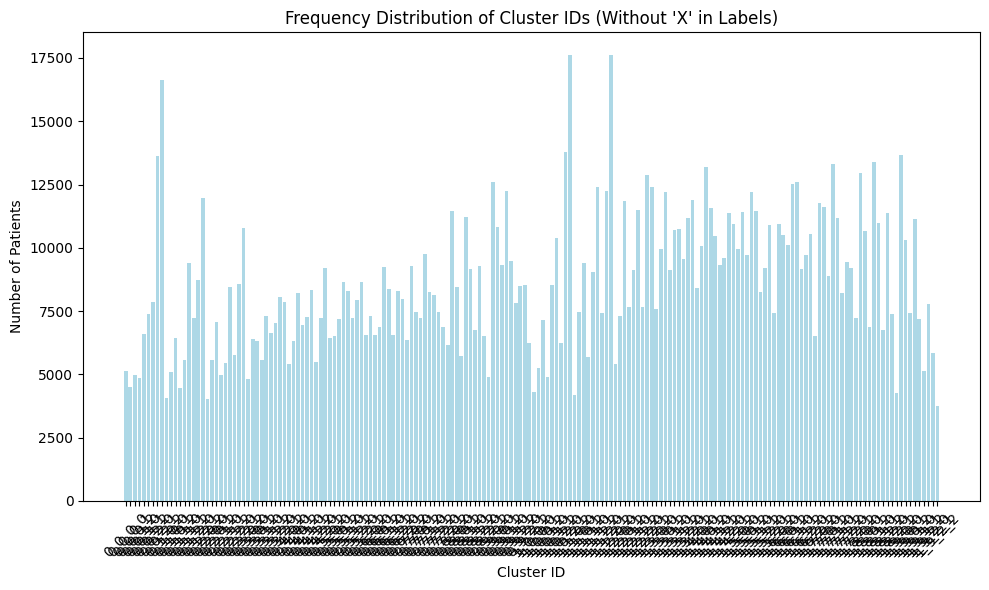

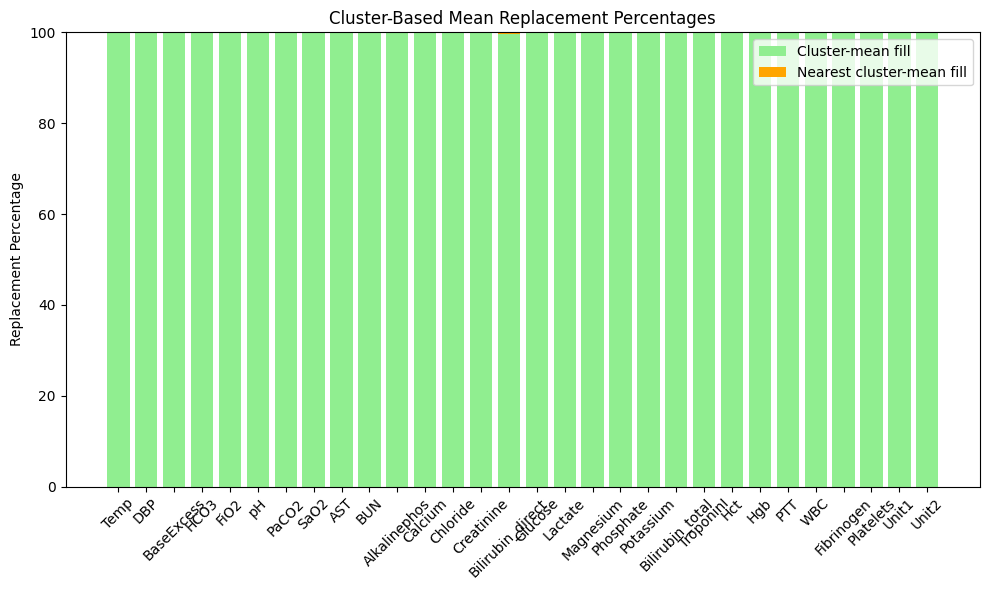

In [ ]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.impute_data import impute_df_no_nans
import utils.impute_data as impute_clusters
importlib.reload(impute_clusters)

# Choose dataset mode: 1 = full, 2 = first 1000 patients
DATASET_MODE = 1
df_to_impute = (combined_df[combined_df["patient_id"] <= 1000].copy() 
                if DATASET_MODE == 2 else combined_df.copy())

# Drop EtCO2 because most patients dont have it
df_to_impute.drop(columns=["EtCO2"], errors="ignore", inplace=True)

# Perform imputation with chosen binning options
df_imputed, replacement_stats = impute_df_no_nans(df_to_impute, nan_density=0.3,
                                                  
    gender_bins=2,
    age_bins=10,
    hr_bins=5,
    map_bins=5,
    o2sat_bins=3,
    sbp_bins=0,
    resp_bins=0)

# Check for any remaining missing values
if df_imputed.isna().sum().sum() == 0:
    print("No NaNs found in the imputed data")

# --- Helper Functions ---

def print_replacement_stats(stats: dict) -> None:
    """Prints formatted replacement statistics."""
    print("\nReplacement statistics (percentages):")
    label_map = {
        "Linear fill": "Linear fill",
        "Cluster fill": "Cluster-mean fill",
        "Nearest cluster fill": "Nearest cluster-mean fill",
        "Initial missing": "Initial missing"
    }
    for col, col_stats in stats.items():
        print(f"Column: {col}")
        for key, value in col_stats.items():
            key_print = label_map.get(key, key.capitalize())
            if isinstance(value, (int, float)):
                print(f"  {key_print}: {value:.2f}%")
            else:
                print(f"  {key_print}: {value}")

def plot_cluster_distribution(df: pd.DataFrame) -> None:
    """Plots the frequency distribution of cluster IDs"""
    cluster_counts = df["cluster_id"].value_counts().sort_index()
    # Remove 'X' parts from cluster labels
    cleaned_labels = [
        "_".join(part for part in cid.split("_") if part != "X")
        for cid in cluster_counts.index
    ]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(cluster_counts)), cluster_counts.values, color="lightblue")
    plt.title("Frequency Distribution of Cluster IDs (Without 'X' in Labels)")
    plt.xlabel("Cluster ID")
    plt.ylabel("Number of Patients")
    plt.xticks(range(len(cluster_counts)), cleaned_labels, rotation=45)
    plt.tight_layout()
    plt.show()

def plot_cluster_fill(stats: dict) -> None:
    """Plots a stacked bar chart showing cluster-based fill percentages."""
    # Filter columns that used the cluster-based method
    cluster_cols = [col for col, stat in stats.items() if stat.get("Method") == "cluster"]
    if not cluster_cols:
        print("No cluster-based columns found for visualization.")
        return

    idx = np.arange(len(cluster_cols))
    cluster_fill = [stats[col]["Cluster fill"] for col in cluster_cols]
    nearest_fill = [stats[col]["Nearest cluster fill"] for col in cluster_cols]

    plt.figure(figsize=(10, 6))
    plt.bar(idx, cluster_fill, label="Cluster-mean fill", color="lightgreen")
    plt.bar(idx, nearest_fill, bottom=cluster_fill, label="Nearest cluster-mean fill", color="lightblue")
    plt.xticks(idx, cluster_cols, rotation=45)
    plt.ylabel("Replacement Percentage")
    plt.title("Cluster-Based Mean Replacement Percentages")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Execution ---

print_replacement_stats(replacement_stats)
plot_cluster_distribution(df_imputed)
plot_cluster_fill(replacement_stats)
